In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r'/kaggle/input/titanic/train.csv' , index_col = 'PassengerId')

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **EDA**

# **let us see how much people are survived**

<Axes: xlabel='Survived', ylabel='count'>

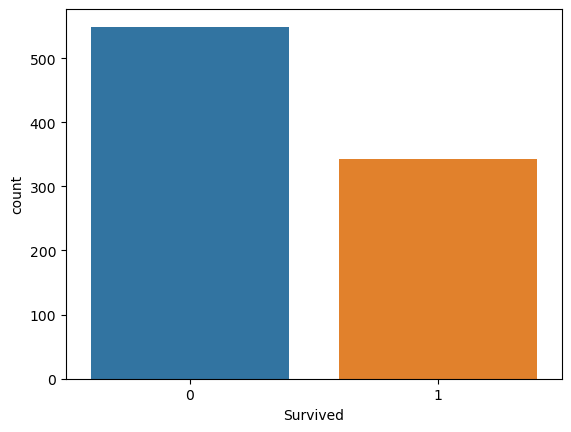

In [5]:
sns.countplot(data = df , x = 'Survived')

> **total 300 people are survived rest of them can not survived due to the deadliest sinkage**

# **how much people are there in each ticket class**

<Axes: xlabel='Pclass', ylabel='count'>

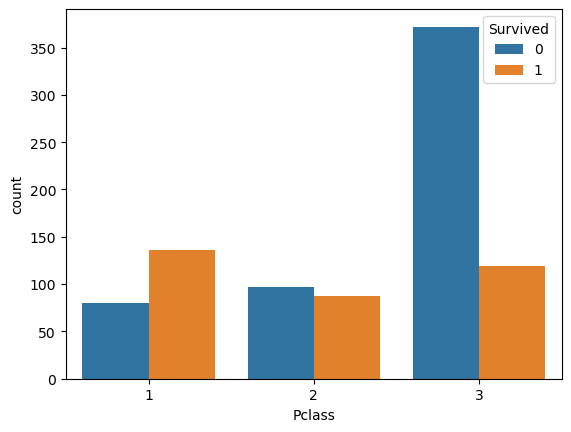

In [6]:
sns.countplot(df , x = 'Pclass' , hue = 'Survived')

* > **higher class ticket is taken only by 200 people where respectively lower class ticket is taken by max people**
* > **again it is very confirm that the casualty in lower class is more as they are more in number and thety were at the lowest possible deck of ship so probability of casualty is more**

## **casualty as per gender**

<Axes: xlabel='Survived', ylabel='count'>

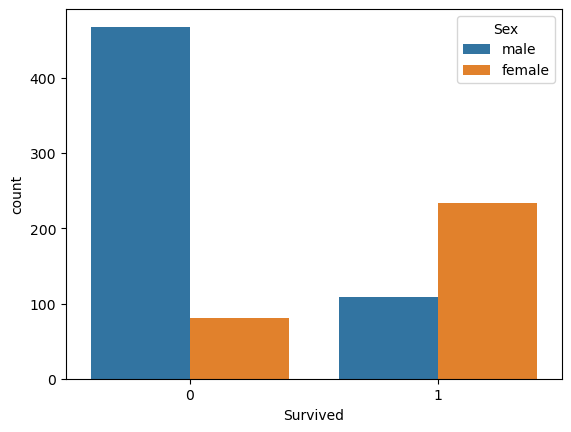

In [7]:
sns.countplot(data = df , x = 'Survived' , hue = 'Sex')

* > **male candidates are less survived**
* > **female passenger are survivved more**

# **let us the fare details of passenger**

In [8]:
fare_data= pd.DataFrame(df.groupby('Pclass')['Fare'].mean())

In [9]:
fare_data

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


<Axes: xlabel='Pclass', ylabel='Fare'>

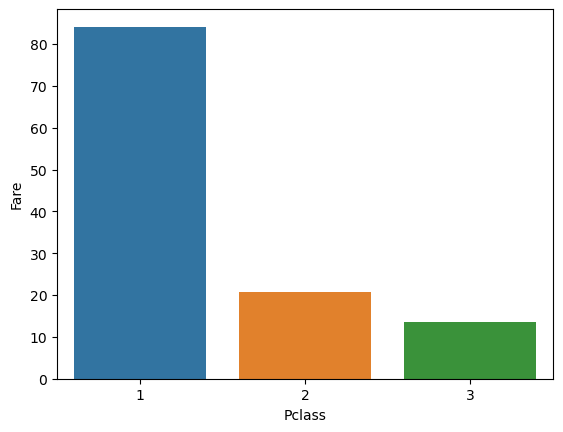

In [10]:
sns.barplot(data = fare_data , y = 'Fare' , x = fare_data.index)

* > **higher class ticket have maximum avg fare**

# **which port people have highest rate of survival**

<Axes: xlabel='Embarked', ylabel='count'>

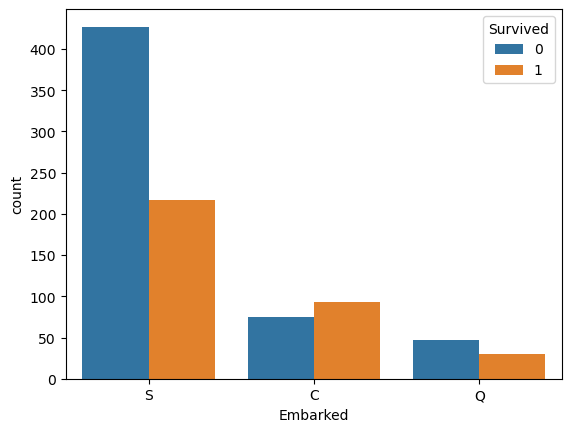

In [11]:
sns.countplot(df , x = 'Embarked' , hue = 'Survived')

* > **southampton port has maximum casualty**
* > **Queenstown port has the lowest casualty**

# **age distribution with casualty**

In [12]:
age_data = pd.DataFrame(df.groupby('Survived')['Age'].mean())

In [13]:
age_data

,Age
Survived,
0,30.626179
1,28.343690


<Axes: xlabel='Survived', ylabel='Age'>

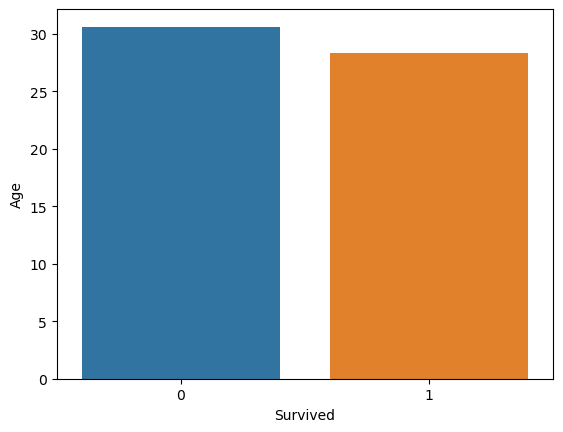

In [14]:
sns.barplot(age_data , x = age_data.index , y = 'Age')

* > **rate of survival less for higher age**